In [52]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

<ipython-input-52-6026ee93bb33>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [53]:
df = pd.read_csv("Dataset/data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-27,9982.179688,10159.879883,9936.620117,10150.650391,10150.650391,207760000
1,2010-08-30,10145.580078,10150.570313,10007.679688,10009.730469,10009.730469,150480000
2,2010-08-31,10006.419922,10073.379883,9941.839844,10014.719727,10014.719727,255420000
3,2010-09-01,10016.009766,10279.080078,10016.009766,10269.469727,10269.469727,205710000
4,2010-09-02,10270.080078,10320.370117,10253.959961,10320.099609,10320.099609,149930000


In [54]:
df.drop(["Date", "Low", "Adj Close"], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,9982.179688,10159.879883,10150.650391,207760000
1,10145.580078,10150.570313,10009.730469,150480000
2,10006.419922,10073.379883,10014.719727,255420000
3,10016.009766,10279.080078,10269.469727,205710000
4,10270.080078,10320.370117,10320.099609,149930000


### Normalizing and removing the null data points

In [55]:
df['Open'] = df['Open']/10000
df['High'] = df['High']/100000
df['Volume'] = df['Volume']/1000000000
df['Close'] = df['Close']/100000
print(df)

nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df["High"][i] = 0
        
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0

Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0

Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

          Open      High     Close   Volume
0     0.998218  0.101599  0.101507  0.20776
1     1.014558  0.101506  0.100097  0.15048
2     1.000642  0.100734  0.100147  0.25542
3     1.001601  0.102791  0.102695  0.20571
4     1.027008  0.103204  0.103201  0.14993
...        ...       ...       ...      ...
2009  2.578699  0.258888  0.258223  0.24162
2010  2.582506  0.258362  0.257336  0.20048
2011  2.571486  0.257626  0.256570  0.21327
2012  2.568858  0.258261  0.257903  0.20033
2013  2.588271  0.260676  0.260496  0.22051

[2014 rows x 4 columns]


In [56]:
X = df[["High", "Open", "Volume"]]
Y = df[["Close"]]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)

X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [57]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1611, 3)
y_train (1611, 1)
X_test (403, 3)
y_test (403, 1)


### Compiling and training the neural network model

In [59]:
classifier = Sequential()
classifier.add(Dense(units =32, kernel_initializer = "uniform", activation = "relu", input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = "uniform", activation = "relu"))
classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation = "linear"))

classifier.compile(optimizer = "adam", loss = "mean_squared_error", metrics = [])
classifier.fit(X_train, Y_train, batch_size =128, epochs = 10, validation_split = 0.05)

Epoch 1/10
12/12 [==============================] - 0s 12ms/step - loss: 0.0220 - val_loss: 0.0313
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0184 - val_loss: 0.0260
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.0195
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.0114
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 8.2868e-04 - val_loss: 2.1782e-04
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 4.2686e-04 - val_loss: 1.7079e-04
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 3.4751e-04 - val_loss: 7.2146e-04
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 2.8933e-04 - val_loss: 7.9161e-04
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 2.7152e-04 -

In [60]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[0.17152698]
 [0.17238928]
 [0.17302176]
 [0.1730234 ]
 [0.17287025]
 [0.17215891]
 [0.17274584]
 [0.17371471]
 [0.17211041]
 [0.17243718]]


### Calculating the error in the trained Neural Network model

In [61]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print("Train Score: %.2f MSE (%.2f RMSE)"% (trainScore, math.sqrt(trainScore)))

testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %.2f MSE (%.2f RMSE)"% (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.02 RMSE)
Test Score: 0.00 MSE (0.05 RMSE)


### Predictions vs Real results

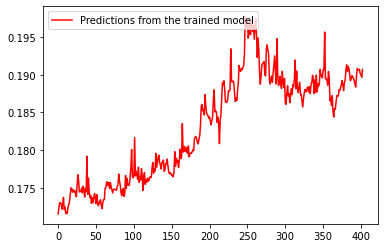

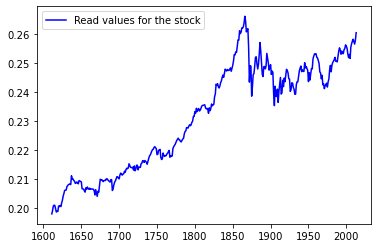

In [62]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()